# Project 1: Life Expectancy

---

# Table of contents

## I. Problem Framing

## II. Import and Evaluate the Data

## III. Exploratory Data Analysis

## IV. Feature Engineering

## V. Run the Regression

## VI. Model Performance's Examination on Test data

## VII. Evaluating the Parsimonious Model and Examining Regression's Assumptions   

## VIII. Conclusion

---

## 1. Problem Framing
- What factors could affect a country's life expectancy? And how do they influence the life expectancy?
- How can we employ these factors to predict the life expectancy of a country?

## 2. Data Import and Evaluate the Data
- A few problems that we should not overlook: missing value, miss-categorized data types, duplicates.

- Does this data help us address our problem?



In [118]:
# Import some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Import data
df = pd.read_csv('life_exp_updated.csv')

# Eyeball the data to make sure that it is imported correctly

df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [120]:
# Check some basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


In [122]:
# Check duplicates

df.duplicated().sum()

0

- It appears that the data has no missing values, data types are properly assigned, and no duplicates are detected.

- The data covers various facets of society, such as economics, population, and health-related features. Therefore, it appears to provide useful indicators for predicting life expectancy.

## 3. Exploratory Data Analysis

- EDA: Present the most interesting findings about the dataset

I. Univariate Analysis:
1. Numerical variable: Examine distribution and detecting outliers with histogram and boxplot
2. Categorical variables: frequency analysis with count plot

II. Bivariate Analysis:
1. Numerical variables: relationship between numeric features and the response variable with scatter plot and correlation heatmap
2. Categorical Variables: Understand the relationship between levels of region and life expectancy using boxplots or pivot tables

III. Multivariate Analysis: Using correlation matrix heatmap and pairplot to understand the relationships between features vs features, and features vs response variable.

### 3.1 Numerical Features Analysis


- EDA: Present the most interesting findings about the dataset

I. Univariate Analysis

In [123]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

Histogram distribution

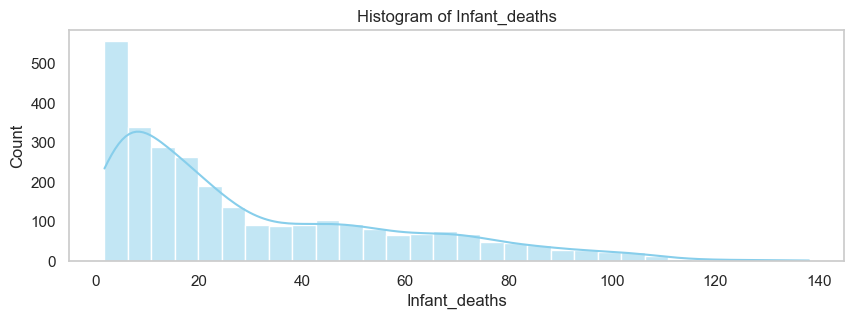

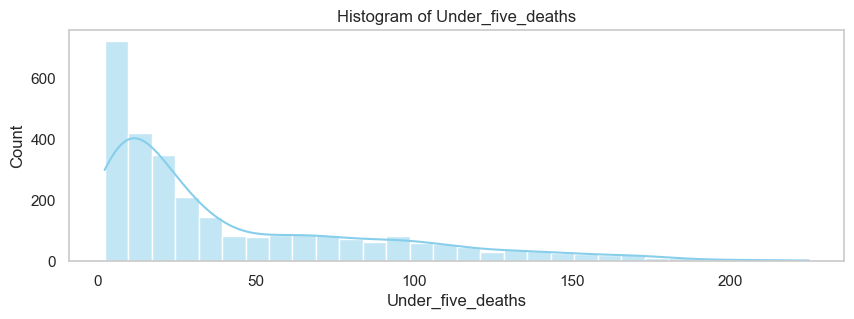

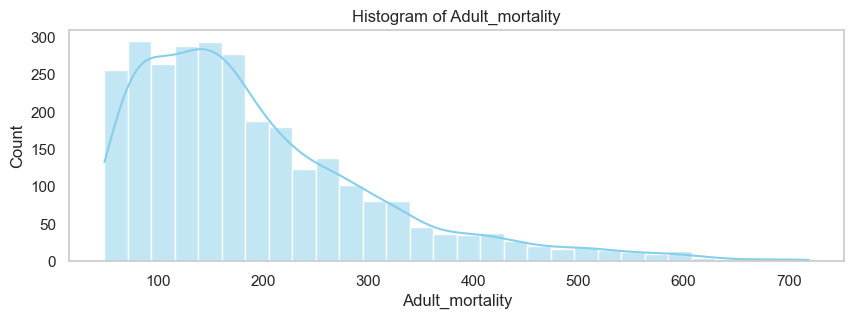

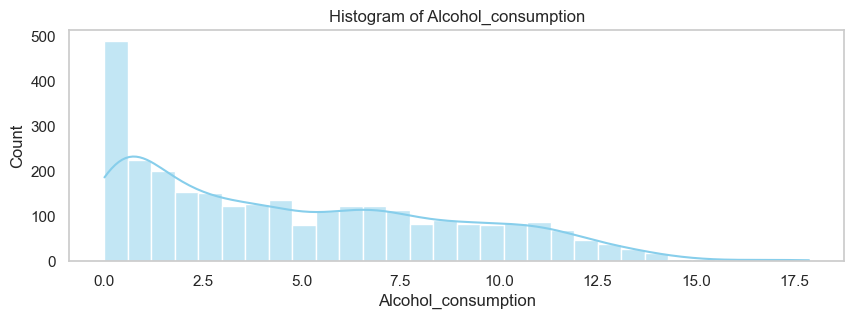

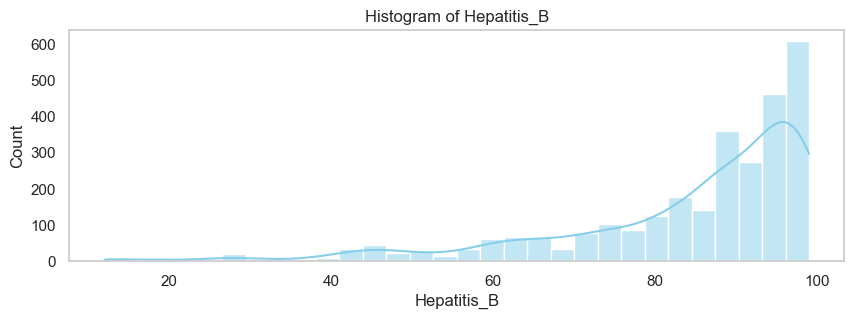

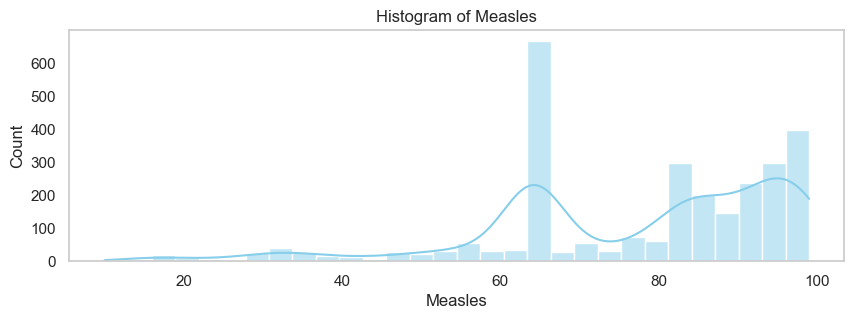

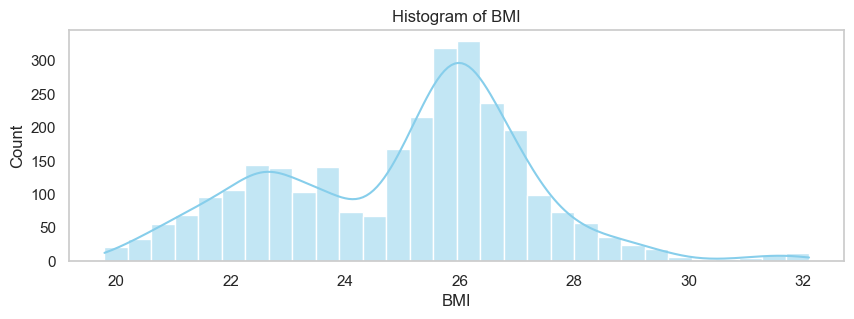

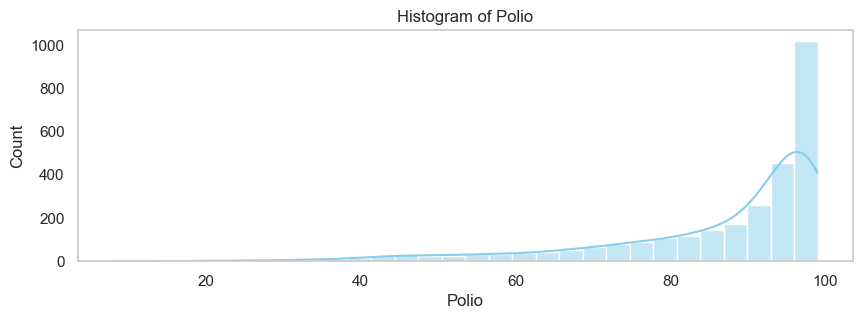

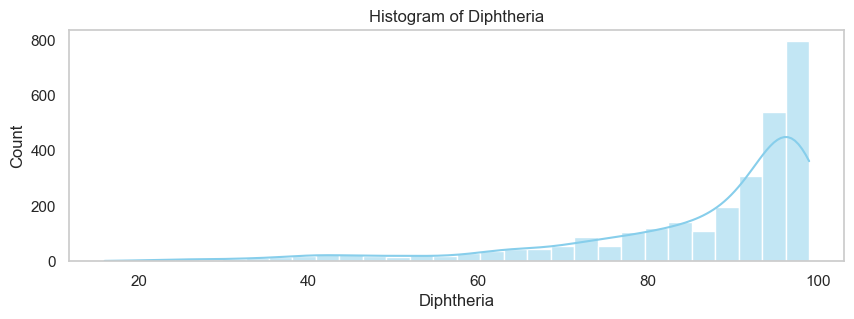

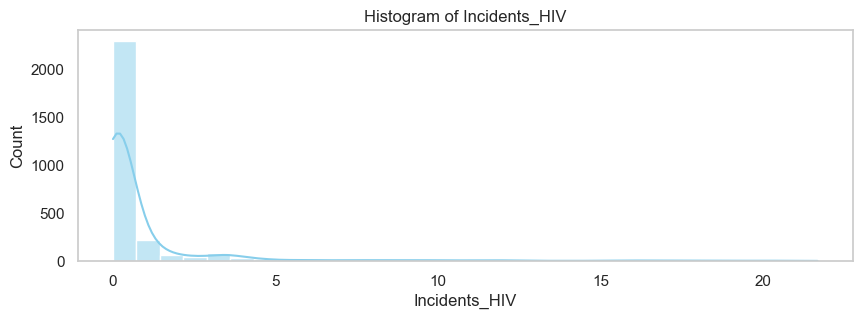

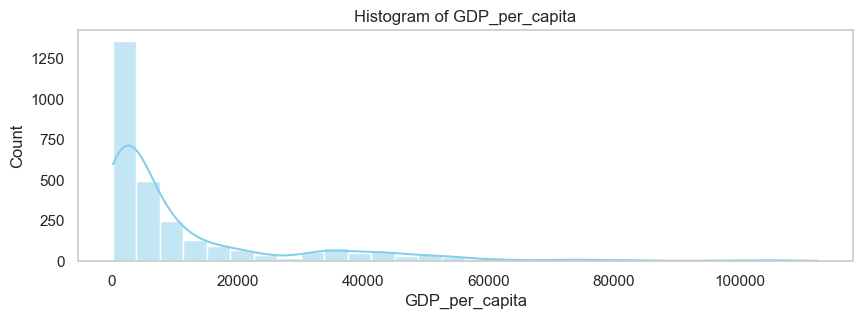

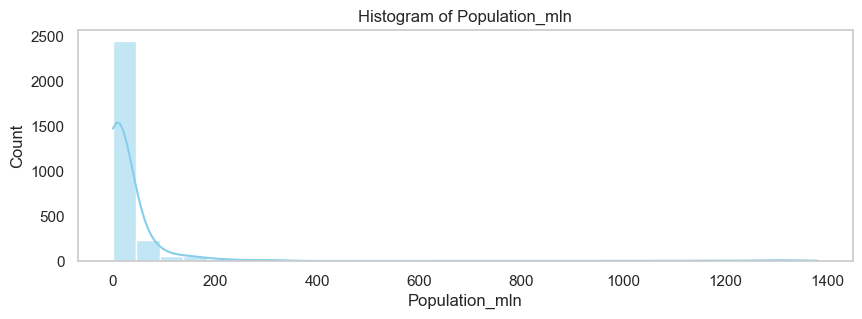

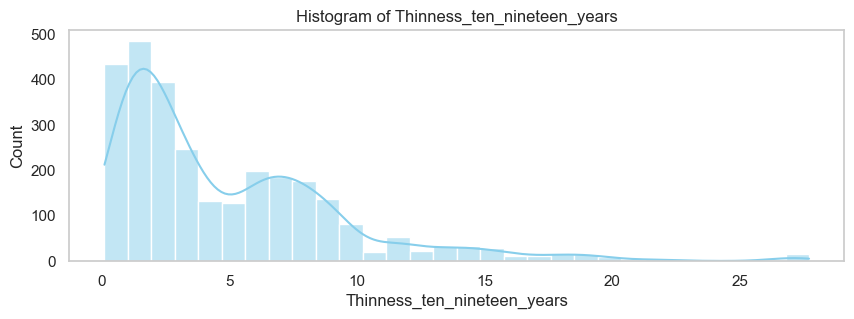

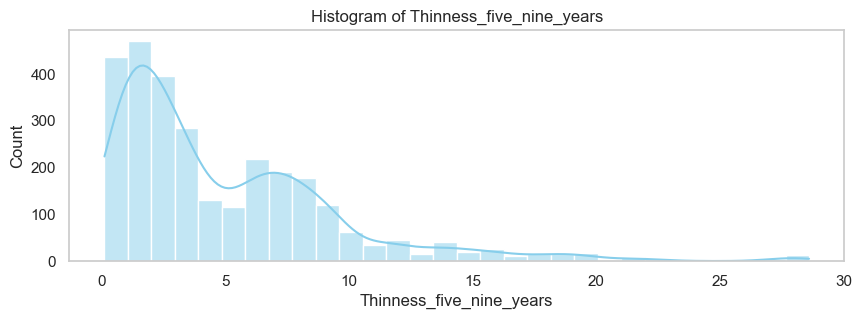

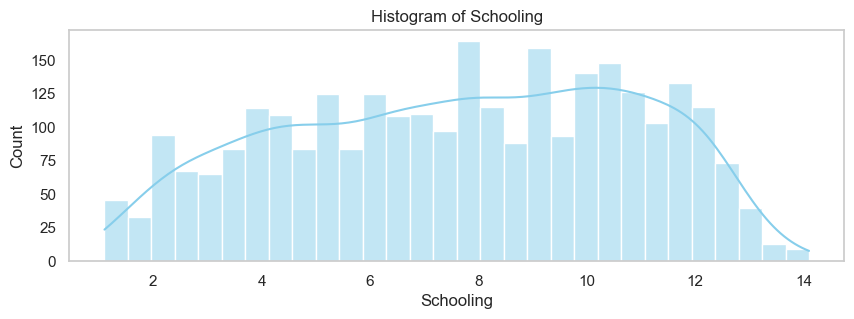

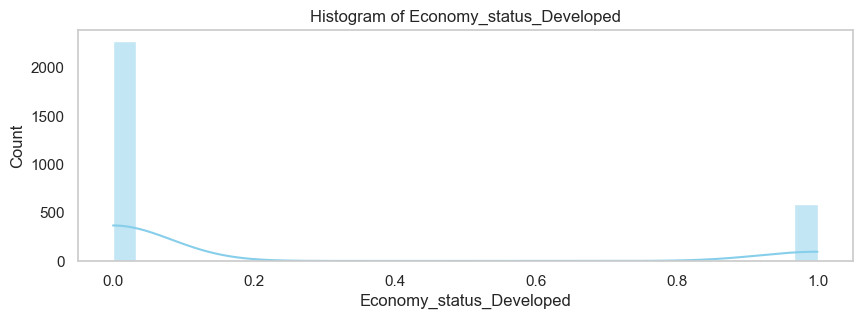

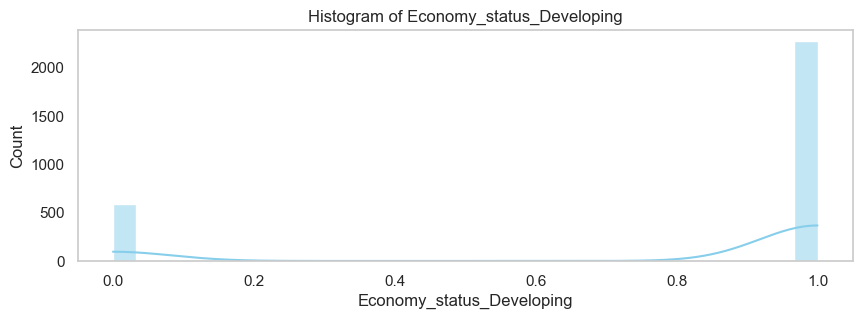

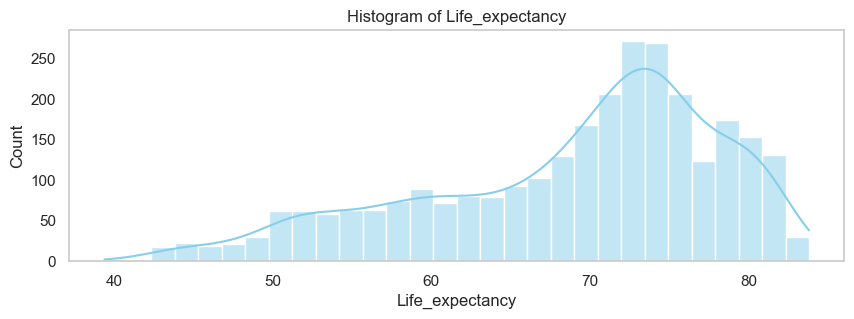

In [124]:
numeric_features = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy']

for feature in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.histplot(df,x=feature, bins=30, kde=True, color='skyblue')
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  plt.show()

Box Plot Distribution 

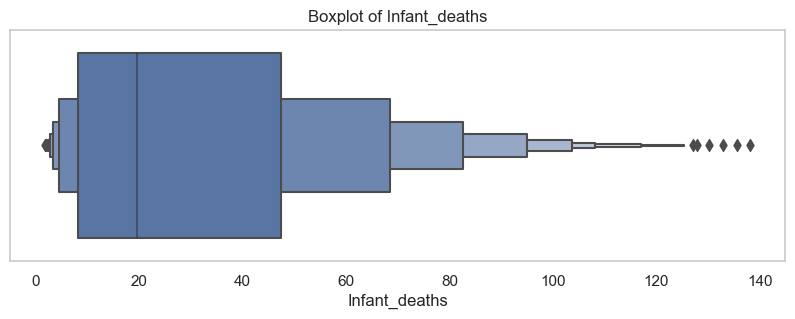

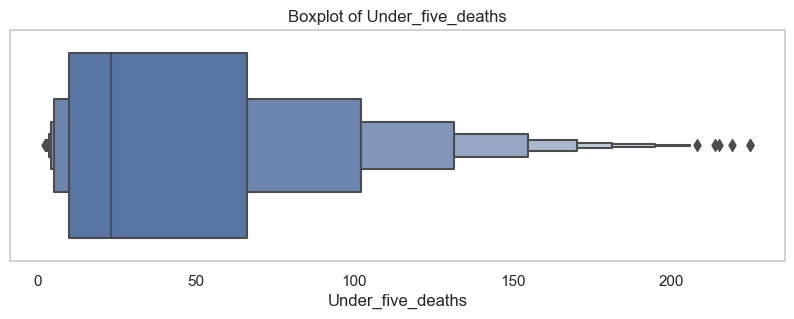

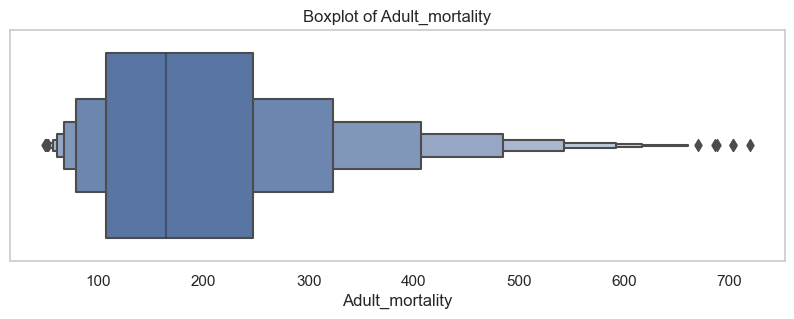

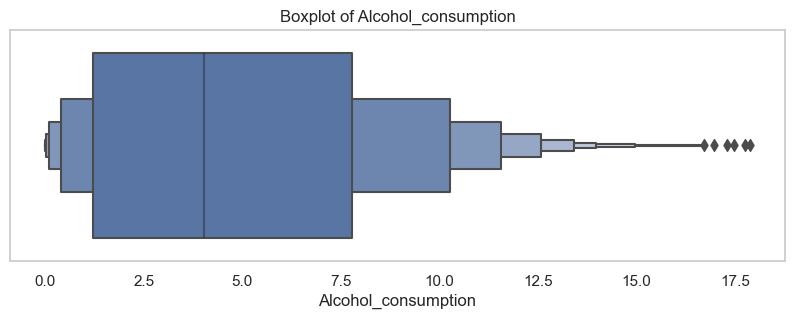

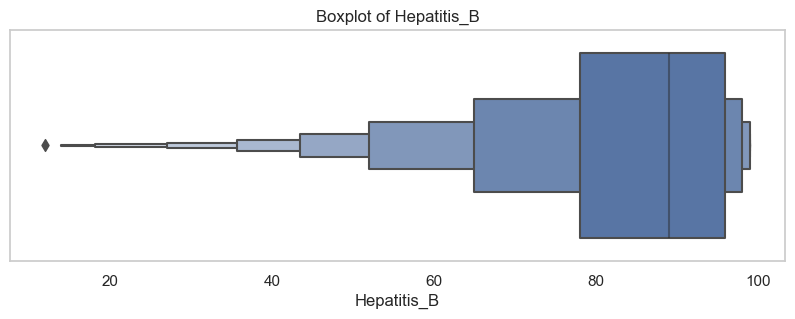

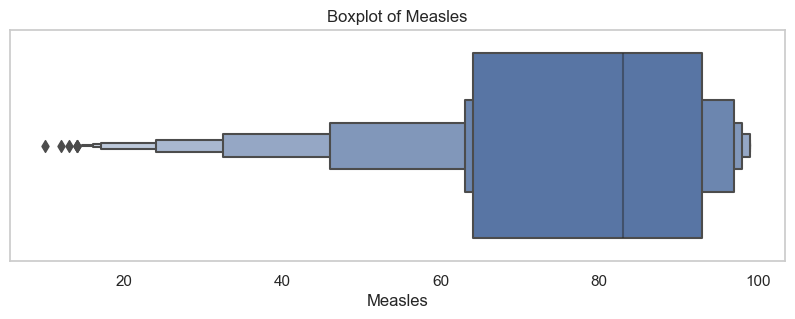

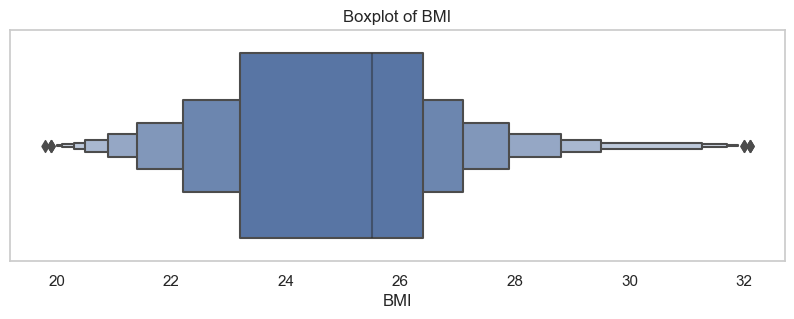

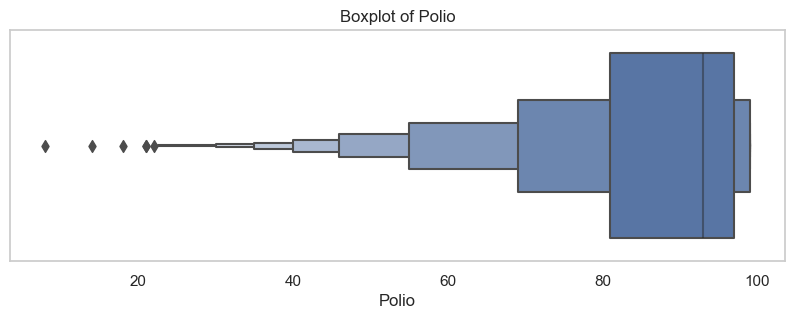

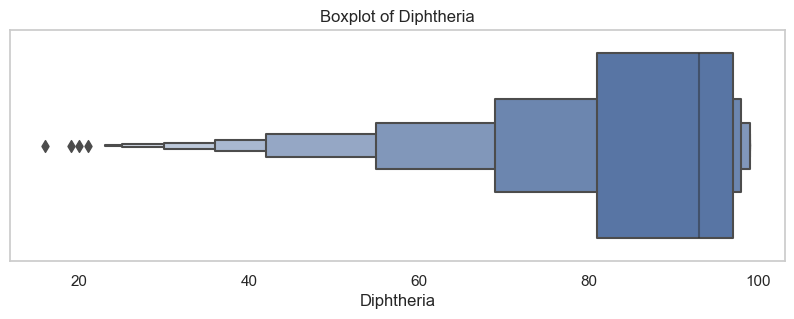

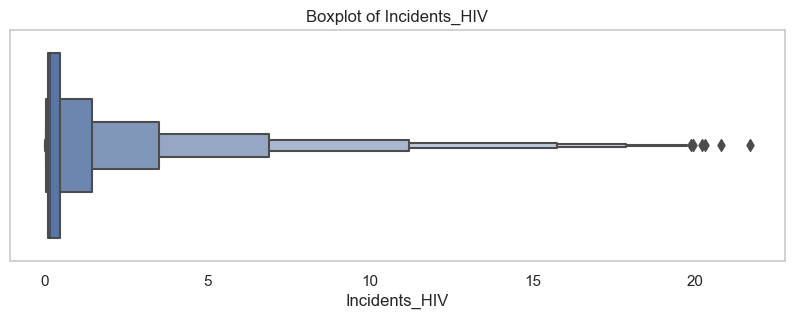

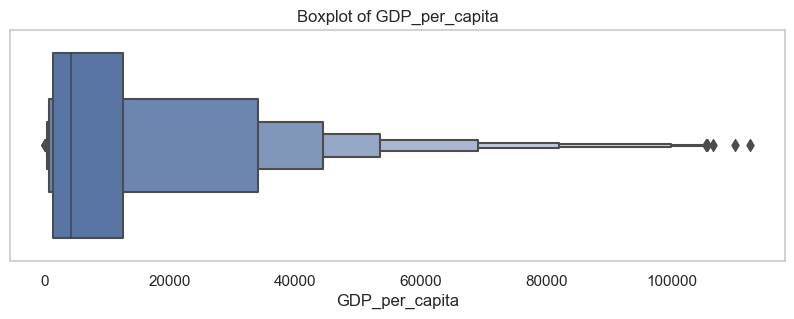

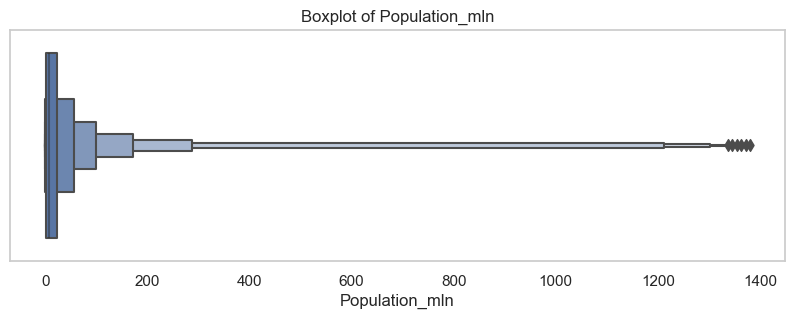

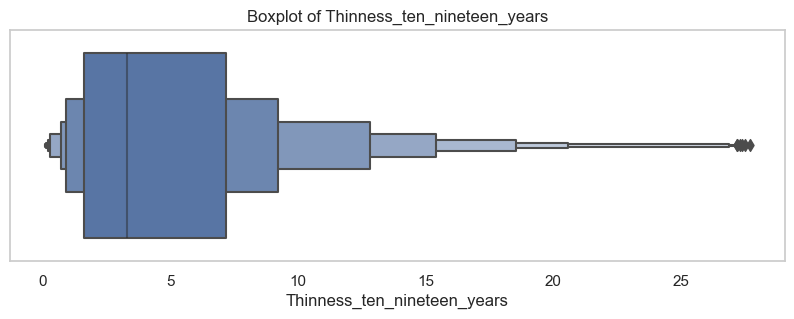

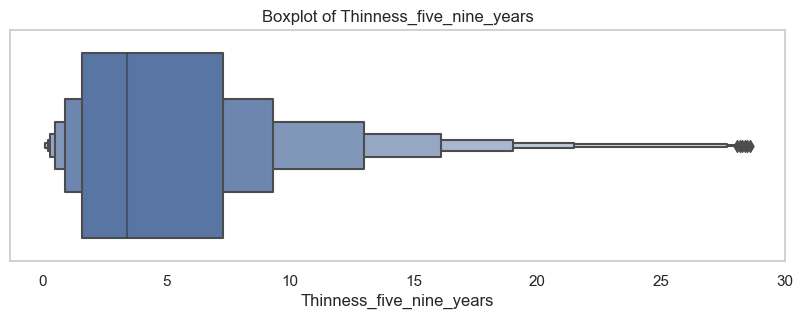

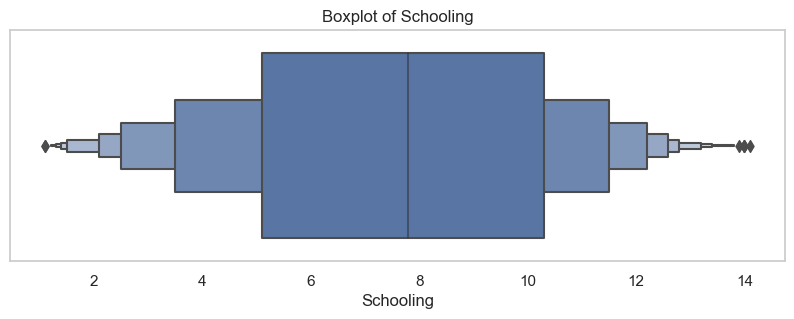

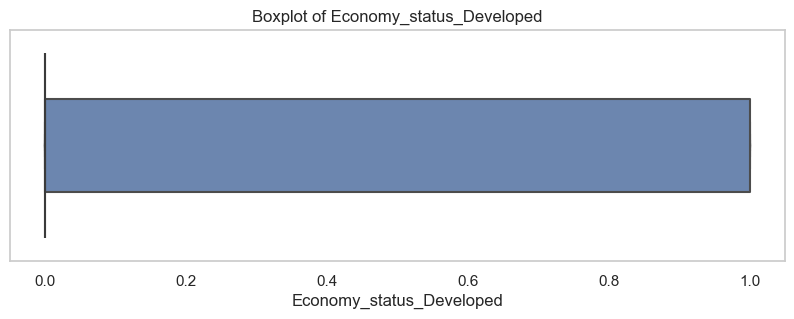

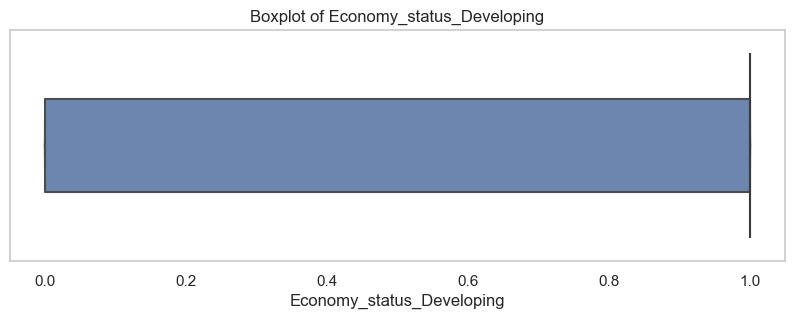

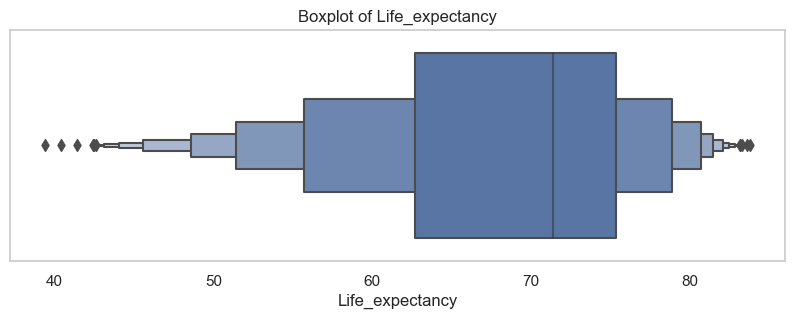

In [125]:
for feature in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.boxenplot(df,
                x = feature)
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  plt.show()

II. Bivariate Analysis

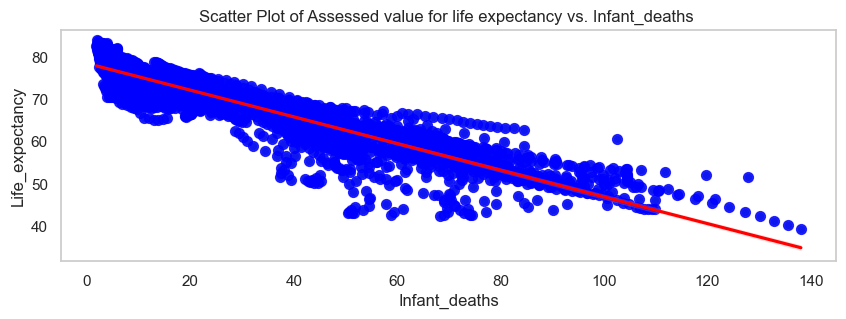

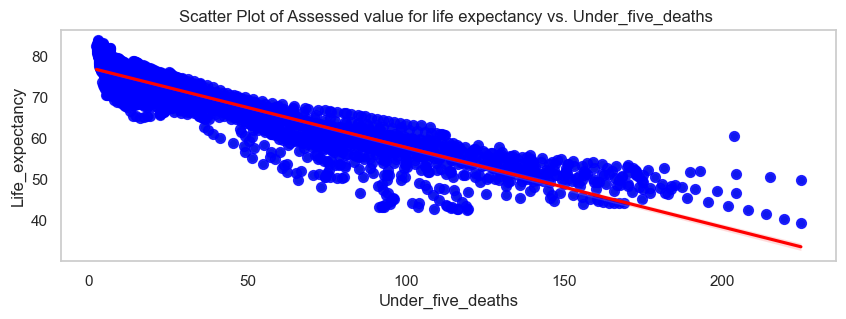

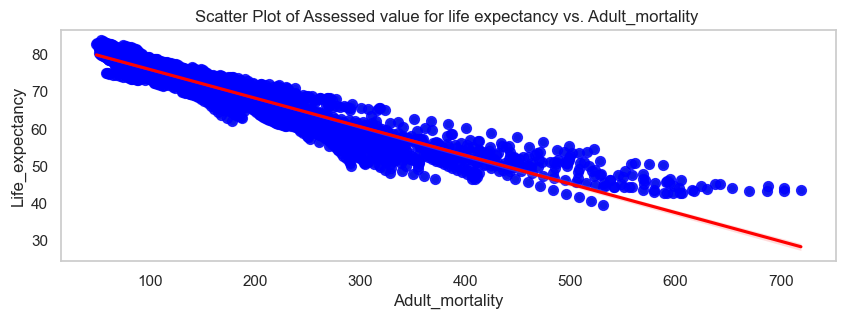

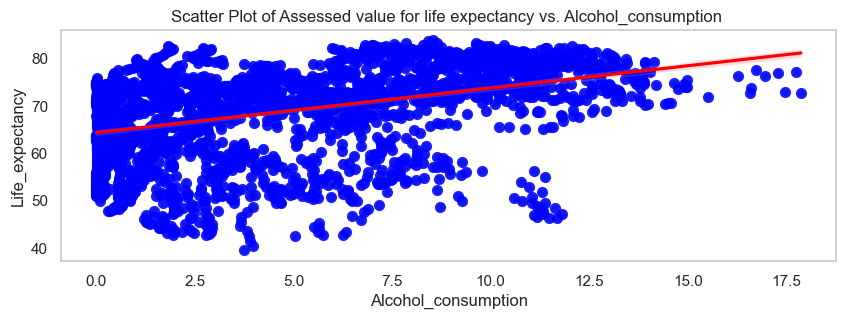

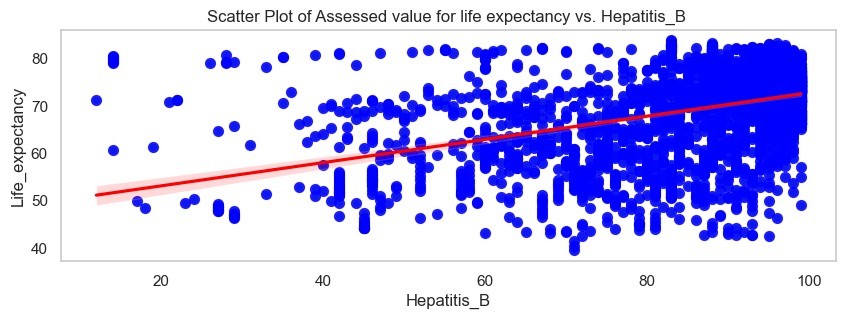

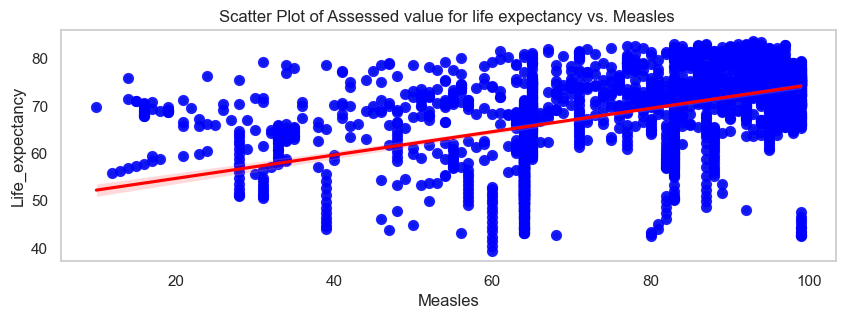

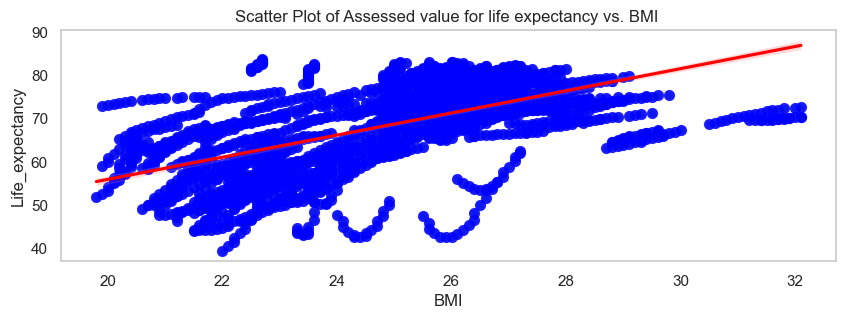

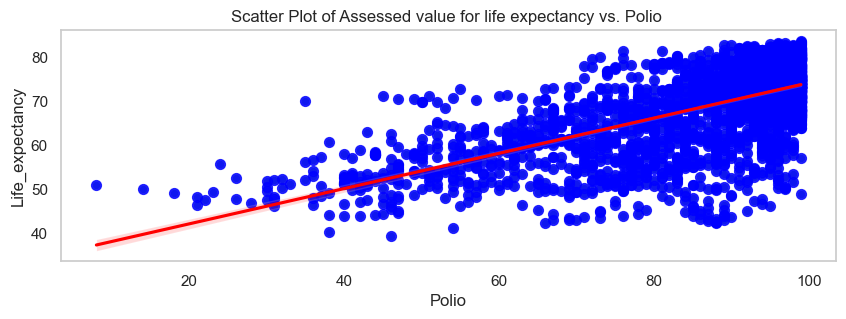

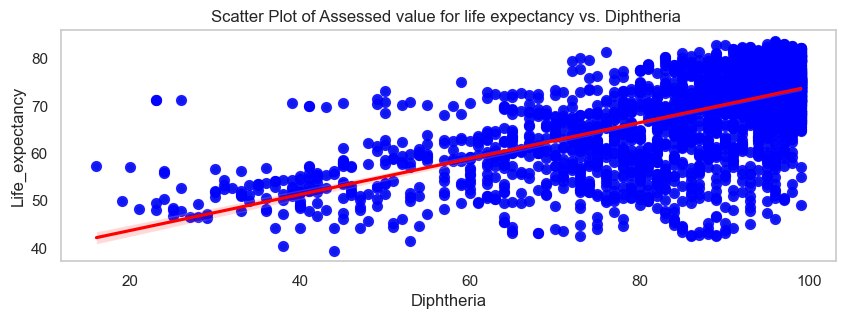

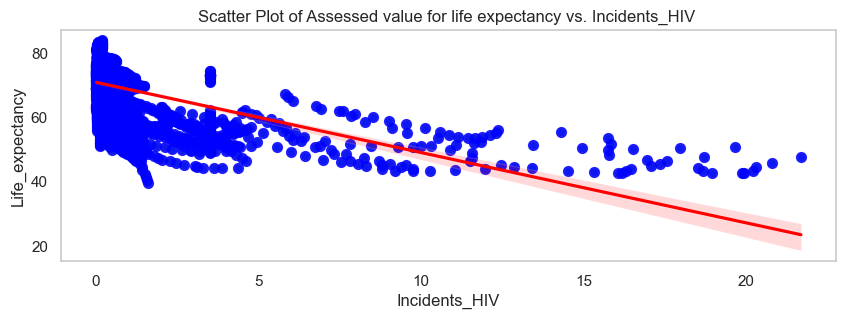

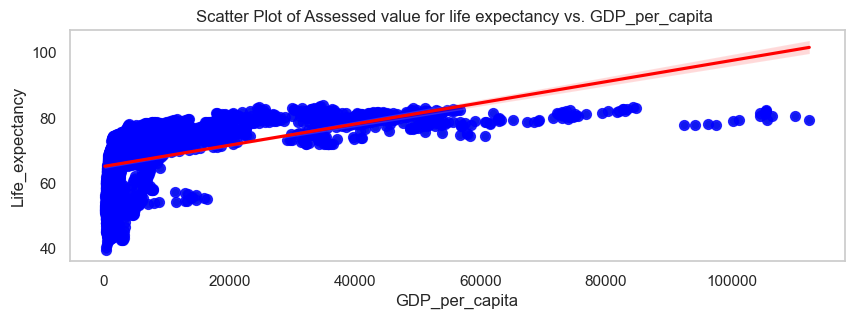

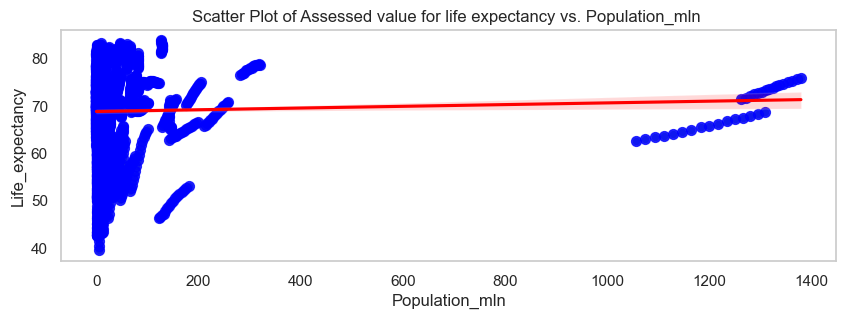

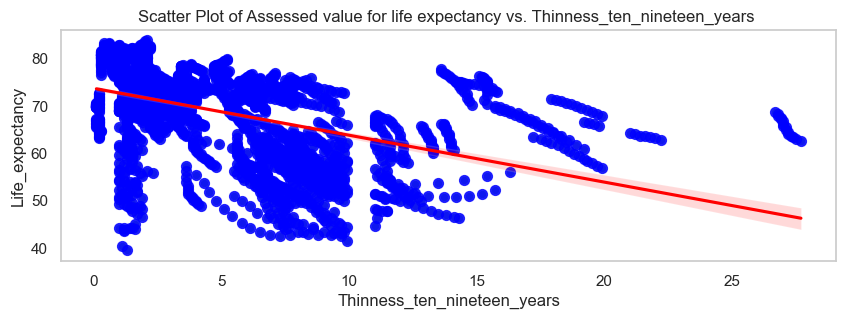

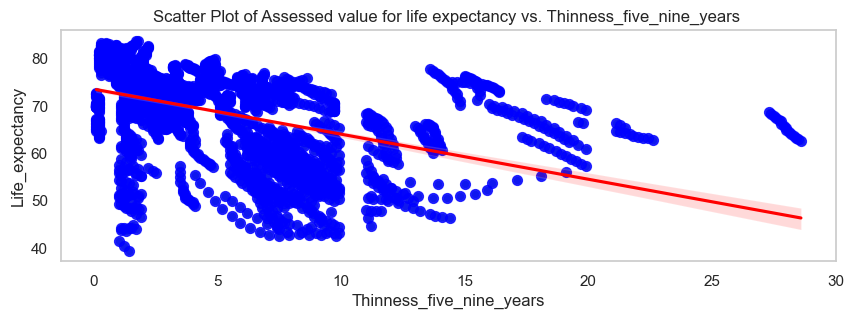

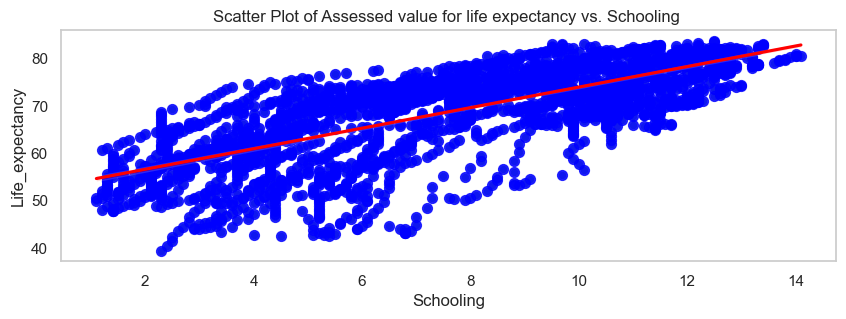

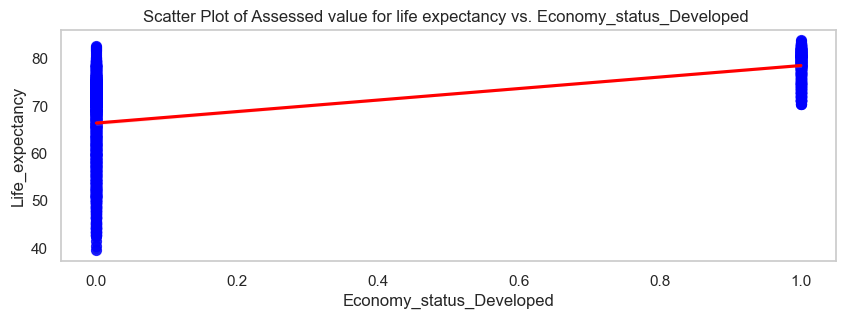

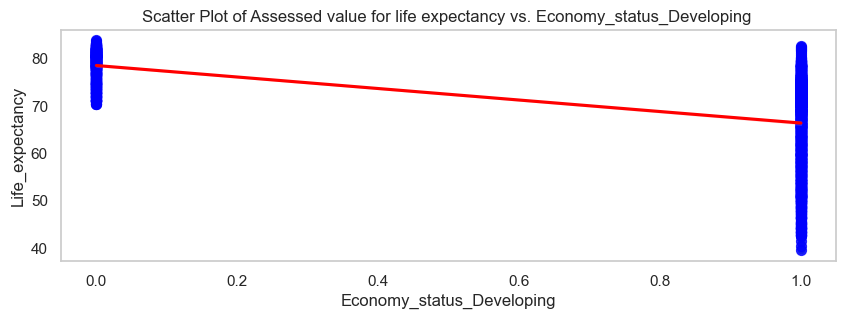

In [126]:
for feature in numeric_features:
  if feature != 'Life_expectancy':
    plt.figure(figsize=(10, 3))
    sns.scatterplot(df,x=feature, y='Life_expectancy')
    sns.regplot(df,x=feature, y='Life_expectancy', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot of Assessed value for life expectancy vs. {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Life_expectancy')
    plt.show()

Bivariate correlation analysis 

In [127]:
# Remove dummies variables before computing correlation
numeric_features.remove('Economy_status_Developed')
numeric_features.remove('Economy_status_Developing')

In [128]:
correlations = df[numeric_features].apply(lambda x: x.corr(df['Life_expectancy']))
df_correlations = correlations.to_frame(name='correlation')
df_correlations = df_correlations.sort_values('correlation', ascending=False)
df_correlations

,correlation
Life_expectancy,1.000000
Schooling,0.732484
Polio,0.641217
Diphtheria,0.627541
BMI,0.598423
GDP_per_capita,0.583090
Measles,0.490019
Hepatitis_B,0.417804
Alcohol_consumption,0.399159
Population_mln,0.026298


Bivariate Correlation Heatmap

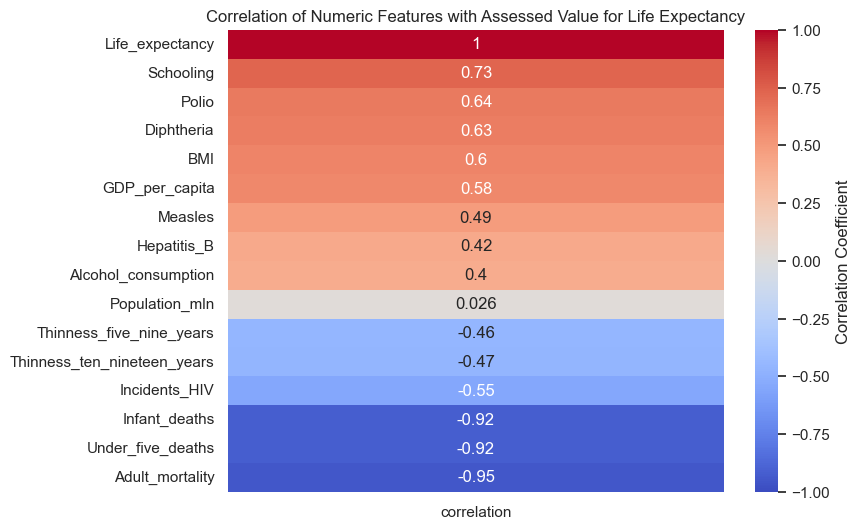

In [129]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of Numeric Features with Assessed Value for Life Expectancy')
plt.show()

III. Multivariate Analysis 

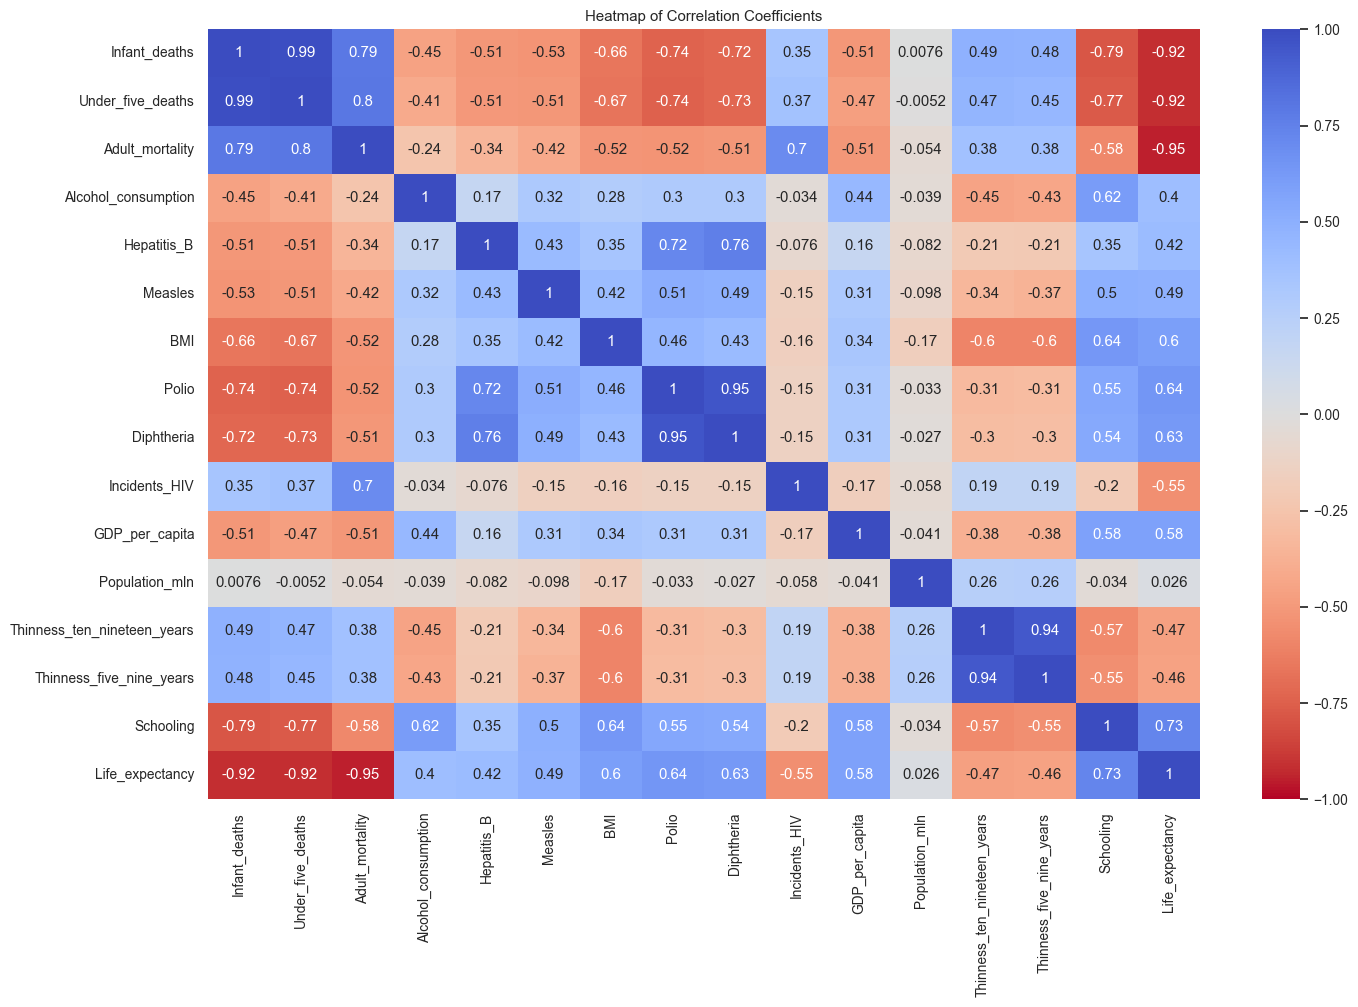

In [130]:
correlation_matrix_life_exp = df[numeric_features].corr()
plt.figure(figsize=(16, 10))
sns.set(font_scale=0.9)
sns.heatmap(correlation_matrix_life_exp, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

Pair plot between numeric features

In [131]:
# sns.pairplot(df[numeric_features].sample(1000))
# plt.title('Pairs Plot')
# plt.show()

### 3.2 Categorical Data Analysis

---


- Frequency distribution
- Bar plot
- Percentage distribution

In [132]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

Frequency Distribution

In [133]:
frequency = df[df['Year'] == 2015]['Region'].value_counts()
frequency

Region
Africa                           51
European Union                   27
Asia                             27
Central America and Caribbean    19
Rest of Europe                   15
Middle East                      14
South America                    12
Oceania                          11
North America                     3
Name: count, dtype: int64

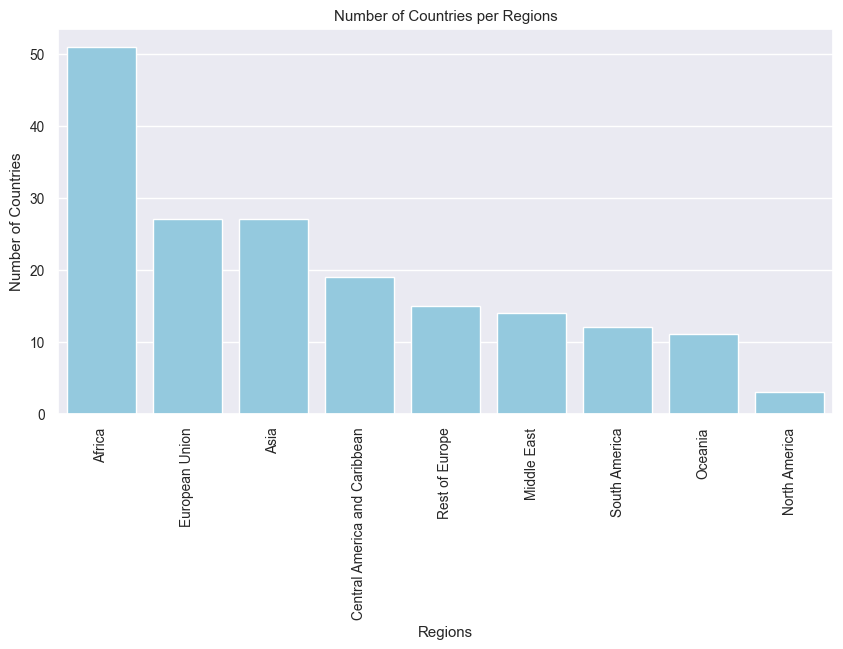

In [134]:
plt.figure(figsize=(10, 5))
sns.barplot(x=frequency.index, y=frequency.values, color='skyblue')
plt.title('Number of Countries per Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Countries')
plt.xticks(rotation=90)
plt.show()

## 4. Feature Engineering

- Convert categorical variables to dummy variables

- Fix outliers using cap and floor (winsorization) method: (Q1 - 1.5 x IQR | Q3 + 1.5 x IQR)


In [135]:
# Convert the Region to dummy variables

df = pd.get_dummies(df, columns=['Region'], drop_first=True)

df = df*1 # convert boolean to int

df.head()

,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,Turkiye,2015,11.1,13.0,105.8240,1.32,97,65,27.8,97,...,1,76.5,0,0,0,1,0,0,0,0
1,Spain,2015,2.7,3.3,57.9025,10.35,97,94,26.0,97,...,0,82.8,0,0,1,0,0,0,0,0
2,India,2007,51.5,67.9,201.0765,1.57,60,35,21.2,67,...,1,65.4,1,0,0,0,0,0,0,0
3,Guyana,2006,32.8,40.5,222.1965,5.68,93,74,25.3,92,...,1,67.0,0,0,0,0,0,0,0,1
4,Israel,2012,3.4,4.3,57.9510,2.89,97,89,27.0,94,...,0,81.7,0,0,0,1,0,0,0,0


1. Feature extraction:
- Can we create new features by transforming existing ones? Some additional features may really add value to our solution

2. Feature selection:
- Select the most relevant features to our response variable.
- Use stepwise to help identify the most relevant features for our models

We remove the Country variable due to the large number of levels in the feature. Also, we would like to focus on factors that can influence the life expectancy, not the country itself.

Since economic status are dummy variables, which indicate whether an economy is developing or developed. Therefore, we can remove developing and just keep developed.


In [136]:
df.drop(['Country', 'Economy_status_Developing'], axis = 1, inplace = True)

## 5. Train the model with linear regression

Perform the using 80/20 method: 80% of the data is used for training, and the rest 20% is used for testing to evaluate the model's performance on unseen data

In [137]:
x = df.drop(['Life_expectancy'], axis = 1)

y = df['Life_expectancy']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 6701)

There are three models that we can examine:
- Model that contains all raw features: We would like to see if outliers of predictors have meaningful effect on life expectancy. Thus, we conduct a model using original values of these features.

- Model that have outliers removed

- Models that have outliers removed and only contain features that are retained after applying stepwise selection.

### 5.1 Model 1: Raw features


The first model would contain all the raw features, without any transformation

In [138]:

def reg_outputs(x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):

    x_train = sm.add_constant(x_train)

    # Run the lm model
    model = sm.OLS(y_train, x_train).fit()

    # evaluate the model on test set

    rsquared= model.rsquared_adj
    
    x_test = sm.add_constant(x_test)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)

    mae = mean_absolute_error(y_test, y_pred)

    return model, rmse, mae, y_pred, rsquared


In [139]:
model1, mod1_rmse, mod1_mae, mod1_pred, mod1_rsquared = reg_outputs()

In [140]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5600.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:21   Log-Likelihood:                -3646.3
No. Observations:                2291   AIC:                             7345.
Df Residuals:                    2265   BIC:                             7494.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   20.6597     11.638      1.775      0.076      -2.162      43.482
Year                                     0.0312      0.006      5.378      0.000       0.020       0.043
Infant_deaths                           -0.0559      0.006     -9.101      0.000      -0.068      -0.044
Under_five_deaths                       -0.0486      0.004    -12.596      0.000      -0.056      -0.041
Adult_mortality                         -0.0467      0.001    -76.753      0.000      -0.048      -0.046
Alcohol_consumption                     -0.0100      0.011     -0.873      0.383      -0.032       0.012
Hepatitis_B                             -0.0087      0.003     -3.433      0.001      -0.014      -0.004
Measles                                  0.0026      0.002      1.522      0.128      -0.001       0.006
BMI                                     -0.1306      0.023     -5.758      0.000      -0.175      -0.086
Polio                                    0.0138      0.006      2.457      0.014       0.003       0.025
Diphtheria                              -0.0103      0.006     -1.808      0.071      -0.022       0.001
Incidents_HIV                            0.1042      0.018      5.764      0.000       0.069       0.140
GDP_per_capita                        1.928e-05   2.42e-06      7.965      0.000    1.45e-05     2.4e-05
Population_mln                          -0.0002      0.000     -0.977      0.329      -0.001       0.000
Thinness_ten_nineteen_years             -0.0332      0.016     -2.051      0.040      -0.065      -0.001
Thinness_five_nine_years                 0.0251      0.016      1.575      0.115      -0.006       0.056
Schooling                                0.0951      0.019      5.119      0.000       0.059       0.131
Economy_status_Developed                 2.5418      0.168     15.165      0.000       2.213       2.870
Region_Asia                              0.4434      0.113      3.918      0.000       0.222       0.665
Region_Central America and Caribbean     2.0816      0.121     17.223      0.000       1.845       2.319
Region_European Union                   -0.5573      0.180     -3.104      0.002      -0.909      -0.205
Region_Middle East                       0.2738      0.142      1.933      0.053      -0.004       0.551
Region_North America                     0.8097      0.238      3.395      0.001       0.342       1.277
Region_Oceania                          -0.6558      0.145     -4.513      0.000      -0.941      -0.371
Region_Rest of Europe                    0.3798      0.140      2.705      0.007       0.104       0.655
Region_South America                     1.8264      0.139     13.113      0.000       1.553       2.100
======================================

### 5.2 Model 2: Outliers removed

In [141]:
# create a function to remove outliers, and replace them with upper and lower boundaries

def winsorization(var, data = df):
    '''
    This function is used to limit value of a numeric
    features by applying upper and lower bound values on outliers
    '''
    q3 = np.percentile(data[var], 75)
    q1 = np.percentile(data[var], 25)
    IQR = q3 - q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR
    var = np.clip(df[var], a_min = lower_bound, a_max = upper_bound)
    return var


Since we need to apply this outlier treatment on the test dataset as well, it's good to build a automated process.

- This process would first fix all outliers of numeric variables. Then run a regression on the updated dataset.

In [142]:
def outlier_treatment(data):
    num_var = data.select_dtypes(include= np.number).columns
    # remove dummary vars
    num_var = [var for var in num_var if ("Region_" not in var) & (var != 'Life_expectancy')]
    num_var.remove('Economy_status_Developed')
    # winsorize num features
    for i in num_var:
        data[i] = winsorization(i, data)
    return data


In [143]:
def automated_reg(data):
    data = outlier_treatment(data)
    x = data.drop(['Life_expectancy'], axis = 1)

    # split dataset
    y = data['Life_expectancy']

    x_train, x_test, y_train, y_test = train_test_split(x,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=6701)

    # run the lm model

    model, rmse, mae, y_pred, rsquared = reg_outputs(x_train, y_train, x_test, y_test)

    return model, rmse, mae, y_test, y_pred, rsquared

Run the regression and extract useful metrics

In [144]:
model2, mod2_rmse, mod2_mae, mod2_y_test, mod2_pred, mod2_rsquared = automated_reg(df)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5243.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:21   Log-Likelihood:                -3720.5
No. Observations:                2291   AIC:                             7493.
Df Residuals:                    2265   BIC:                             7642.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -11.7073     12.054     -0.971      0.332     -35.345      11.930
Year                                     0.0483      0.006      8.047      0.000       0.037       0.060
Infant_deaths                            0.0103      0.007      1.388      0.165      -0.004       0.025
Under_five_deaths                       -0.0938      0.005    -18.734      0.000      -0.104      -0.084
Adult_mortality                         -0.0494      0.001    -79.651      0.000      -0.051      -0.048
Alcohol_consumption                      0.0485      0.012      3.941      0.000       0.024       0.073
Hepatitis_B                             -0.0071      0.003     -2.213      0.027      -0.013      -0.001
Measles                                 -0.0002      0.002     -0.112      0.911      -0.004       0.003
BMI                                     -0.1648      0.023     -7.027      0.000      -0.211      -0.119
Polio                                   -0.0037      0.008     -0.489      0.625      -0.018       0.011
Diphtheria                               0.0044      0.008      0.558      0.577      -0.011       0.020
Incidents_HIV                           -0.8568      0.136     -6.301      0.000      -1.123      -0.590
GDP_per_capita                        4.652e-05   5.22e-06      8.910      0.000    3.63e-05    5.68e-05
Population_mln                           0.0128      0.002      7.936      0.000       0.010       0.016
Thinness_ten_nineteen_years             -0.0380      0.019     -1.957      0.050      -0.076     7.4e-05
Thinness_five_nine_years                 0.0322      0.019      1.665      0.096      -0.006       0.070
Schooling                                0.0477      0.019      2.457      0.014       0.010       0.086
Economy_status_Developed                 1.9887      0.177     11.223      0.000       1.641       2.336
Region_Asia                             -0.4742      0.127     -3.746      0.000      -0.722      -0.226
Region_Central America and Caribbean     1.6382      0.129     12.743      0.000       1.386       1.890
Region_European Union                   -1.2065      0.194     -6.211      0.000      -1.588      -0.826
Region_Middle East                      -0.5011      0.153     -3.266      0.001      -0.802      -0.200
Region_North America                    -0.1705      0.250     -0.682      0.495      -0.661       0.320
Region_Oceania                          -1.0482      0.159     -6.606      0.000      -1.359      -0.737
Region_Rest of Europe                   -0.1479      0.158     -0.937      0.349      -0.458       0.162
Region_South America                     1.0316      0.150      6.881      0.000       0.738       1.326
======================================

### 5.3 Model 3: Outliers treated and stepwise selection

In [145]:
# First we need to fix outliers
df_outlier_fixed = outlier_treatment(df)

# split the data to train and test with 80/20 ratio
x = df_outlier_fixed.drop(['Life_expectancy'], axis = 1)

# split dataset
y = df_outlier_fixed['Life_expectancy']
x_train, x_test, mod3_y_train, mod3_y_test = train_test_split(x, y, test_size=0.2, random_state=6701)

First, calculate Variance Inflation Factors (VIF) for the training data after outliers have been removed

In [146]:
vifres = pd.DataFrame()
x_train = sm.add_constant(x_train)
vifres["Variable"] = x_train.columns
vifres["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vifres)


                                Variable            VIF
0                                  const  218381.431211
1                                   Year       1.155670
2                          Infant_deaths      61.471043
3                      Under_five_deaths      68.357073
4                        Adult_mortality       6.382636
5                    Alcohol_consumption       3.617044
6                            Hepatitis_B       3.026726
7                                Measles       1.790033
8                                    BMI       3.913462
9                                  Polio      14.278568
10                            Diphtheria      15.347990
11                         Incidents_HIV       3.644024
12                        GDP_per_capita       4.060031
13                        Population_mln       1.391398
14           Thinness_ten_nineteen_years       9.195896
15              Thinness_five_nine_years       9.257856
16                             Schooling       5

Create a function for automated Forward/Backward model selection

In [147]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

Automated Variable Selection

In [148]:
selected_features  = stepwise_selection(x_train, mod3_y_train)
print('resulting features:')
print(selected_features)
print('---')
print(f'Total number of features: {len(selected_features)}')

Add  Infant_deaths with p-value 0.0000
Add  const with p-value 0.0000
Add  Adult_mortality with p-value 0.0000
Add  Alcohol_consumption with p-value 0.0000
Add  Under_five_deaths with p-value 0.0000
Add  GDP_per_capita with p-value 0.0000
Add  Region_Oceania with p-value 0.0000


Add  Region_Central America and Caribbean with p-value 0.0000
Add  Population_mln with p-value 0.0000
Add  Economy_status_Developed with p-value 0.0000
Add  Region_South America with p-value 0.0000
Add  Region_European Union with p-value 0.0000
Add  Year with p-value 0.0000
Drop const with p-value 0.4681
Add  BMI with p-value 0.0000
Drop Infant_deaths with p-value 0.1890
Add  Incidents_HIV with p-value 0.0000
Add  Hepatitis_B with p-value 0.0014
Add  Region_Middle East with p-value 0.0069
Add  Region_Asia with p-value 0.0012
Add  Schooling with p-value 0.0098
resulting features:
['Adult_mortality', 'Alcohol_consumption', 'Under_five_deaths', 'GDP_per_capita', 'Region_Oceania', 'Region_Central America and Caribbean', 'Population_mln', 'Economy_status_Developed', 'Region_South America', 'Region_European Union', 'Year', 'BMI', 'Incidents_HIV', 'Hepatitis_B', 'Region_Middle East', 'Region_Asia', 'Schooling']
---
Total number of features: 17


Run the regression with the selected features

In [149]:
x_train = x_train[selected_features]

x_test = x_test[selected_features]

model3, mod3_rmse, mod3_mae, mod3_pred, mod3_rsquared = reg_outputs(x_train, mod3_y_train, x_test, mod3_y_test)

In [150]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     7714.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:27:25   Log-Likelihood:                -3724.1
No. Observations:                2291   AIC:                             7484.
Df Residuals:                    2273   BIC:                             7587.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -12.3631     11.714     -1.055      0.291     -35.335      10.609
Adult_mortality                         -0.0494      0.001    -80.302      0.000      -0.051      -0.048
Alcohol_consumption                      0.0450      0.012      3.830      0.000       0.022       0.068
Under_five_deaths                       -0.0871      0.002    -52.052      0.000      -0.090      -0.084
GDP_per_capita                        4.596e-05   5.02e-06      9.150      0.000    3.61e-05    5.58e-05
Region_Oceania                          -0.9387      0.129     -7.301      0.000      -1.191      -0.687
Region_Central America and Caribbean     1.7344      0.104     16.641      0.000       1.530       1.939
Population_mln                           0.0129      0.002      8.451      0.000       0.010       0.016
Economy_status_Developed                 1.9675      0.172     11.443      0.000       1.630       2.305
Region_South America                     1.1402      0.121      9.415      0.000       0.903       1.378
Region_European Union                   -1.0677      0.142     -7.495      0.000      -1.347      -0.788
Year                                     0.0486      0.006      8.303      0.000       0.037       0.060
BMI                                     -0.1609      0.022     -7.425      0.000      -0.203      -0.118
Incidents_HIV                           -0.8212      0.127     -6.485      0.000      -1.070      -0.573
Hepatitis_B                             -0.0067      0.002     -2.943      0.003      -0.011      -0.002
Region_Middle East                      -0.4356      0.131     -3.314      0.001      -0.693      -0.178
Region_Asia                             -0.3704      0.099     -3.759      0.000      -0.564      -0.177
Schooling                                0.0477      0.018      2.584      0.010       0.011       0.084
==============================================================================
Omnibus:                      225.945   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.709
Skew:                          -0.463   Prob(JB):                    2.43e-171
Kurtosis:                       5.715   Cond. No.                     6.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 6. Examine Model's Performance on Test data

- Extract adjusted R squared from each model.

- Compare Adj Rsquared, RMSE, and MAE between 3 models


In [151]:
metrics_table = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Adj Rsquared': [mod1_rsquared, mod2_rsquared, mod3_rsquared],
    'RMSE': [mod1_rmse, mod2_rmse, mod3_rmse],
    'MAE': [mod1_mae, mod2_mae, mod3_mae],
}

metrics_table = pd.DataFrame(metrics_table)

round(metrics_table,4)

,Model,Adj Rsquared,RMSE,MAE
0,Model 1,0.9839,1.2045,0.9591
1,Model 2,0.9828,1.1814,0.9062
2,Model 3,0.9828,1.1849,0.9072


## 7. Model Evaluation and Examine Assumptions

RMSE and MAE are ways to measure how well a model predicts outcomes: lower numbers mean the model is more accurate and makes fewer mistakes.


Model 3 appears to be the best model among all three models because:

- All predictors are signficant (P-value < 0.05)

- It has lower RMSE and MAE than model 1, and these figures also seem to be identical to model 2.

- It has the least number of features (17 vs 25) -> achieve parsimonious model.


Now let's examine if the model has satisfied linear regression's assumptions

### 7.1 Residual's normality

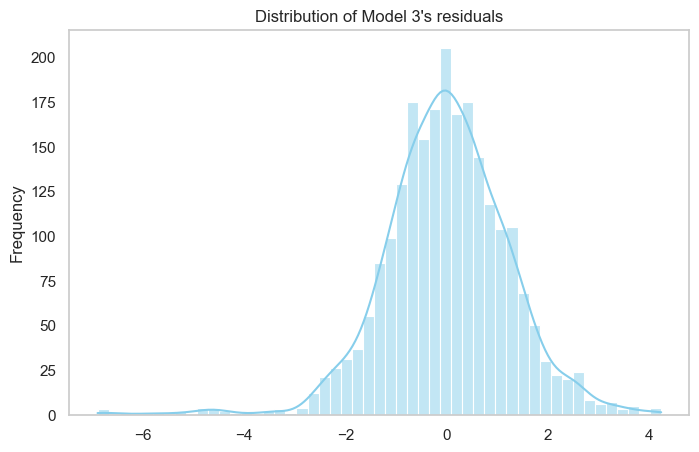

In [152]:
# keep the background color white
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "white"})
plt.figure(figsize = (8,5))
sns.histplot(
    data = model3.resid,
    color = 'skyblue',
    kde= True
)
plt.ylabel('Frequency')
plt.title("Distribution of Model 3's residuals")
plt.show()

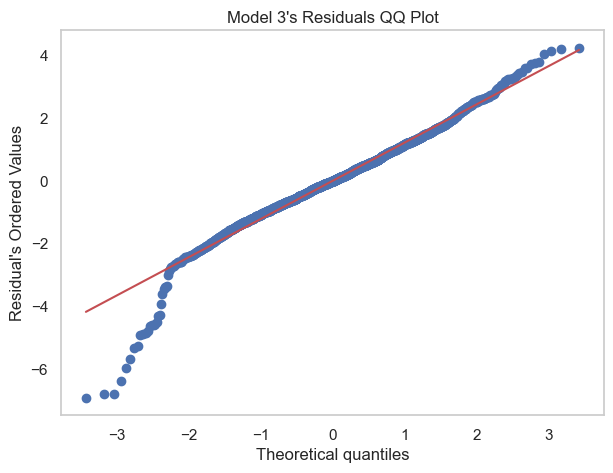

In [153]:
# Create QQ plot
plt.figure(figsize = (7,5))
stats.probplot(model3.resid, dist="norm", plot=plt)
plt.ylabel("Residual's Ordered Values")
plt.title("Model 3's Residuals QQ Plot")
plt.show()



The majority of residual's distribution appears to follow a normal distribution. However, there are some values at the lower end quantiles seem to divert away from the diagonal line.

Since we have removed outliers, the most reasonable explanation for this diversion is that the model tends to underperform when it has to predict life expectancy of countries that have lower life expectancy.

### 7.2 Heteroscedasticity Check

Check if there are any patterns between residuals and fitted values

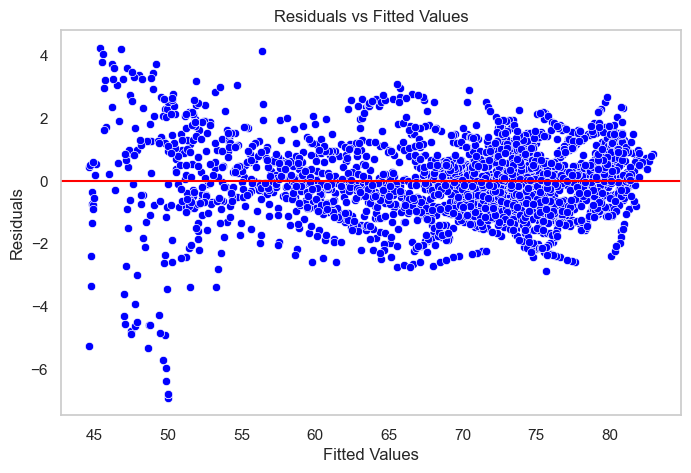

In [154]:
plt.figure(figsize = (8,5))
sns.scatterplot(
    x = model3.fittedvalues,
    y = model3.resid,
    color = 'blue'
)
plt.axhline(y = 0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
    


As suspected, the model seems to struggle with accuracy when predicting life expectancy for countries that have lower life expectancies. In these cases, the errors in prediction are significantly larger.

Apart from that, there are no other serious patterns detected from the plots, and the variance appears to be quite constant.

### 7.3 Multicolinearity Check

In [155]:
vifres = pd.DataFrame()
x_train_filtered = sm.add_constant(x_train[selected_features])
vifres["Variable"] = x_train_filtered.columns
vifres["VIF"] = [variance_inflation_factor(x_train_filtered.values, i) for i in range(x_train_filtered.shape[1])]
print(vifres)


                                Variable            VIF
0                                  const  206341.854364
1                        Adult_mortality       6.272505
2                    Alcohol_consumption       3.306296
3                      Under_five_deaths       7.637402
4                         GDP_per_capita       3.760358
5                         Region_Oceania       1.464287
6   Region_Central America and Caribbean       1.576706
7                         Population_mln       1.254454
8               Economy_status_Developed       7.271777
9                   Region_South America       1.332694
10                 Region_European Union       3.884491
11                                  Year       1.097238
12                                   BMI       3.343570
13                         Incidents_HIV       3.161811
14                           Hepatitis_B       1.559987
15                    Region_Middle East       1.804098
16                           Region_Asia       1

After applying stepwise selection method and filtering out some features, all VIFs are now less than 10 (except the const).

This indicates that multicolinarity is no longer a major issue, and we can proceed building a model with these retained features.

## 8. Conclusion

- Our best model, model 3, has an extremely high R-squared (0.983). This indicates that the model can explain approximately 98.3% variability in life expectancy.

- Model 3 also has a very low RMSE(1.1849), and MAE (0.9072). Since the model has large errors when predicting lower end values of life expectancy, its RMSE is found to be quite significantly higher than the MAE. However, it's both are still very low overall, indicating the model's great predictive power.

Key Takeaways from features

- Focus on economic developement:  increasing GDP per capital and countries that have developed economic status would have a tendency to have a higher life expectancy.

- Healthcare investment: Reducing adult mortality rates, under 5 deaths, and raising HIV awareness through better healthcare can significantly impact life expectancy.
